In [273]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [274]:

# URL File from github
path_retail_data = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Week 7-Dimentional reduction\PCA-LDA-and-tSNE-and-dimentional-reduction\retail_data_W23 - retail_data_W23.csv"
path_retail_orders = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Week 7-Dimentional reduction\PCA-LDA-and-tSNE-and-dimentional-reduction\retail_orders_W23 - retail_orders_W23.csv"
path_store = r"C:\Users\ninic\OneDrive - Lambton College\Term 2\3014 - Introduction to Artificial Intelligence 01\Week 7-Dimentional reduction\PCA-LDA-and-tSNE-and-dimentional-reduction\store - store.csv"
#reading data
df_retail_data = pd.read_csv(path_retail_data)
df_retail_orders = pd.read_csv(path_retail_orders)
df_store = pd.read_csv(path_store)


In [275]:
df_retail_data


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,3,5,2015-07-31,821,1,1,0,1,409
1,4,5,2015-07-31,1498,1,1,0,1,427
2,5,5,2015-07-31,559,1,1,0,1,445
3,6,5,2015-07-31,589,1,1,0,1,463
4,10,5,2015-07-31,681,1,1,0,1,535
...,...,...,...,...,...,...,...,...,...
651008,1106,2,2013-01-01,0,0,0,a,1,18309955
651009,1109,2,2013-01-01,0,0,0,a,1,18310009
651010,1112,2,2013-01-01,0,0,0,a,1,18310063
651011,1113,2,2013-01-01,0,0,0,a,1,18310081


In [276]:
df_retail_orders


,Id,Orders
0,409,8314
1,427,13995
2,445,4822
3,463,5651
4,535,7185
...,...,...
651008,18309955,0
651009,18310009,0
651010,18310063,0
651011,18310081,0


In [277]:
df_store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [278]:
# CCount of nule values
nule_data_sum = df_retail_data.isnull().sum()
nule_orders_sum = df_retail_orders.isnull().sum()
nule_store_sum = df_store.isnull().sum()

print(nule_data_sum,nule_orders_sum,nule_store_sum)



Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64 Id        0
Orders    0
dtype: int64 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [279]:
#merging dataframes
#merging retail data and retail orders
df_merged = pd.merge(df_retail_data, df_retail_orders, on='Id', how='inner')  # inner join
#merging the resulting dataframe with the remaining which for this case is store
df_merged = pd.merge(df_merged, df_store, on='Store', how='inner')  # inner join
df_merged


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Orders,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,3,5,2015-07-31,821,1,1,0,1,409,8314,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,3,4,2015-07-30,823,1,1,0,1,20479,8977,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,2,2015-07-28,818,1,1,0,1,60619,8864,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,7,2015-07-26,0,0,0,0,0,100759,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,3,6,2015-07-25,412,1,0,0,0,120829,3878,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651008,1,1,2013-01-07,785,1,1,0,1,18169663,7176,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
651009,1,7,2013-01-06,0,0,0,0,1,18189733,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
651010,1,6,2013-01-05,635,1,0,0,1,18209803,4997,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
651011,1,5,2013-01-04,619,1,0,0,1,18229873,4486,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [280]:
df_merged.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
Id                             int64
Orders                         int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

### Preprocessing to elaborate PCA model

It is important to know if variables such as the date are important for the model, that is why we did a Dickey Fuller test to find out if the orders are stationary.

In [281]:
# Make sure the 'Date' column is of type datetime
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_mergedcopy = df_merged.copy()

# Set the 'Date' column as the index of the DataFrame
df_merged.set_index('Date', inplace=True)

# Calculate the number of orders per day
cantidad_ordenes_por_dia = df_merged.resample('D').sum()

# Perform the Augmented Dickey-Fuller test
resultado_adf = adfuller(cantidad_ordenes_por_dia['Orders'])

# Print the results
print('test statistics:', resultado_adf[0])
print('P value:', resultado_adf[1])



test statistics: -4.830019091325034
P value: 4.7633057563525225e-05


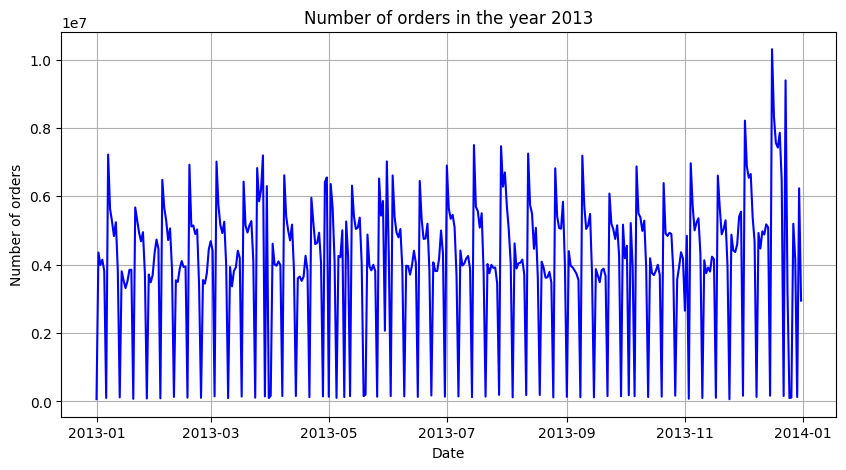

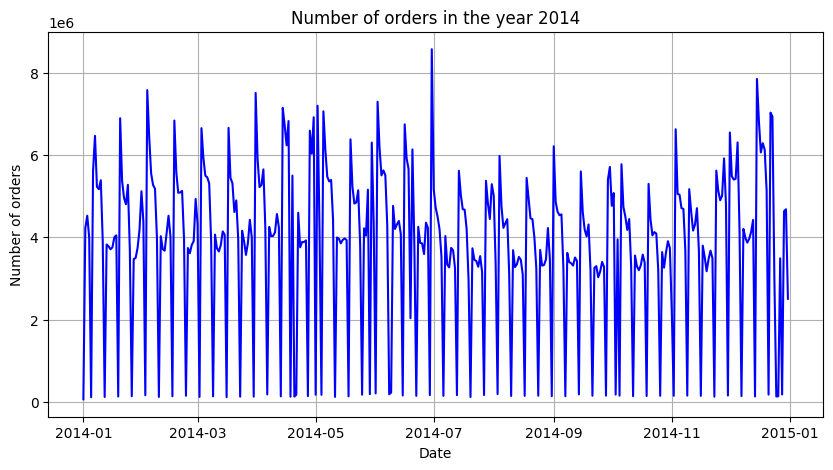

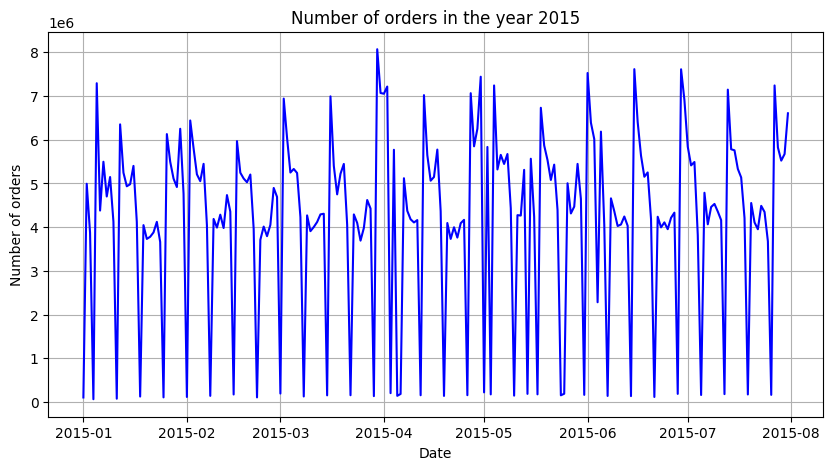

In [282]:
import matplotlib.pyplot as plt

# Agrupar los datos por año
cantidad_ordenes_por_anio = cantidad_ordenes_por_dia.resample('Y').sum()

# Generar un gráfico separado para cada año
for year in cantidad_ordenes_por_anio.index.year:
    data_year = cantidad_ordenes_por_dia[cantidad_ordenes_por_dia.index.year == year]
    plt.figure(figsize=(10, 5))
    plt.plot(data_year.index, data_year['Orders'], color='blue')
    plt.title(f'Number of orders in the year {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of orders')
    plt.grid(True)
    plt.show()


As it was confirmed that the orders are stationary, it is possible to leave only the month of the date to be able to process it in the PCA. Additionally, other columns that cannot be processed are also eliminated.

In [286]:
#Extract the month and save it in a new 'month' column
df_merged['Month'] = df_mergedcopy['Date'].dt.month
df_merged.reset_index(drop=True, inplace=True)
df_merged



,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Orders,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month
0,3,5,821,1,1,0,1,409,8314,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
1,3,4,823,1,1,0,1,20479,8977,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
2,3,2,818,1,1,0,1,60619,8864,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
3,3,7,0,0,0,0,0,100759,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
4,3,6,412,1,0,0,0,120829,3878,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651008,1,1,785,1,1,0,1,18169663,7176,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
651009,1,7,0,0,0,0,1,18189733,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
651010,1,6,635,1,0,0,1,18209803,4997,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
651011,1,5,619,1,0,0,1,18229873,4486,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1


In [288]:
df_merged.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Id', 'Orders', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month'],
      dtype='object')

> ### PCA RESULTS

Optimal number of components: 12


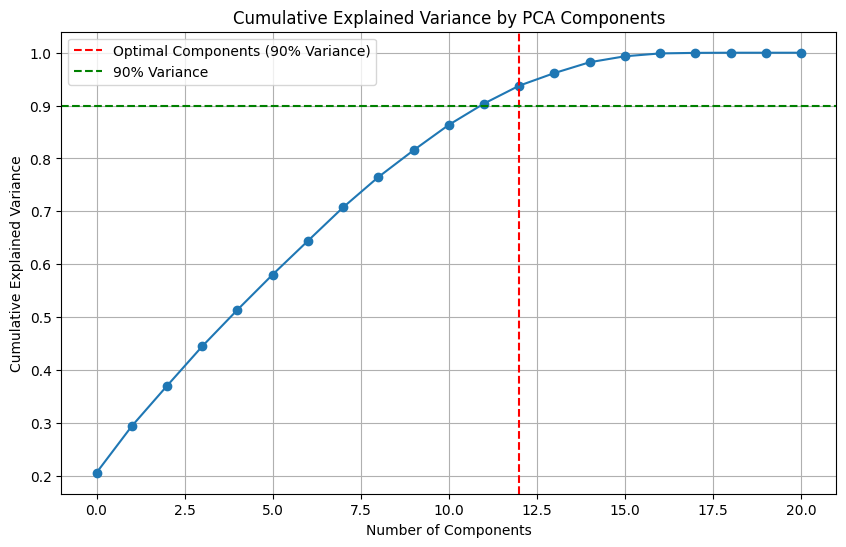

In [290]:

# Separating numerical and categorical features
numerical_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Id', 'Orders', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Month']
categorical_features = ['StoreType', 'Assortment']

# Handling missing values for all columns in the DataFrame
# Replace NaNs in numerical columns with the median
df_merged[numerical_features] = df_merged[numerical_features].apply(lambda x: x.fillna(x.median()), axis=0)

# Replace NaNs in categorical columns with the mode (most common value)
for column in df_merged.columns:
    mode_value = df_merged[column].mode()[0]
    df_merged[column].fillna(mode_value, inplace=True)

# Confirm no more NaNs in the DataFrame
if df_merged.isnull().sum().any():
    raise ValueError("There are still NaN values in the DataFrame")

# Standardizing the numerical features
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(df_merged[numerical_features])

# Applying One-Hot Encoding to categorical features
encoder = OneHotEncoder()
X_encoded_categorical = encoder.fit_transform(df_merged[categorical_features])

# Concatenating the scaled numerical features and encoded categorical features
X_final = np.hstack([X_scaled_numerical, X_encoded_categorical.toarray()])

# Applying PCA
pca = PCA()
pca.fit(X_final)

# Calculating cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determining the optimal number of components: 90% variance explained
optimal_components = np.where(cumulative_variance >= 0.90)[0][0] + 1

print("Optimal number of components:", optimal_components)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=optimal_components, color='r', linestyle='--', label='Optimal Components (90% Variance)')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.legend()
plt.grid(True)
plt.show()








In [292]:


# Aplicar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=optimal_components)
X_pca = pca_optimal.fit_transform(X_final)

# Mostrar las cargas (loadings) de los componentes principales
loadings = pca_optimal.components_

# Ajustar para usar get_feature_names_out en lugar de get_feature_names
feature_names = numerical_features + list(encoder.get_feature_names_out(categorical_features))
df_loadings = pd.DataFrame(loadings, columns=feature_names, index=['PC' + str(i+1) for i in range(optimal_components)])

print("Loadings (contributions of each original variable to each principal component):")
print(df_loadings)


plt.figure(figsize=(12, 6))
sns.heatmap(df_loadings.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


Loadings (contributions of each original variable to each principal component):
      DayOfWeek  Customers      Open     Promo  SchoolHoliday        Id  \
PC1   -0.391684   0.488521  0.460113  0.327111       0.107388 -0.018089   
PC2   -0.054148  -0.040323  0.028072  0.048135       0.000364  0.076500   
PC3    0.000856  -0.047368 -0.033867 -0.029964       0.184737 -0.239613   
PC4   -0.075964  -0.061092 -0.060172 -0.025966       0.485474 -0.405834   
PC5    0.316270   0.251004 -0.008097 -0.161828      -0.580039 -0.496440   
PC6   -0.016253  -0.030988  0.014293  0.029485      -0.037993 -0.013525   
PC7    0.011435   0.022202 -0.006601 -0.032098       0.041556  0.052958   
PC8    0.142897   0.187287 -0.046364 -0.291971       0.265479  0.565649   
PC9    0.091815   0.045945  0.109675 -0.052194      -0.418291  0.433292   
PC10   0.094654   0.194075  0.314154 -0.783411       0.200808 -0.113018   
PC11  -0.011587  -0.011206  0.068243 -0.111044      -0.008365 -0.026642   
PC12   0.687084   0.

NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>